$$\require{mhchem}$$

<center><H1>Datorlaboration - reaktionskinetik</H1></center>

<div style="text-align: right"> <i>Reviderat senast: 2025-02-21</i>
    </div>

<H4>Laborationens syften:</H4>

* Illustrera och undersöka när steady-state-approximation kan användas som en lämplig approximation för att analysera en komplex reaktionsmekanism, inklusive hur mekanismen och hastighetskonstanterna för de ingående stegen påverkar reaktionens kinetiska beteende.

* Ge träning i att skriva och implementera kod i Python för att genomföra numeriska lösningar av kinetiska modeller för komplexa reaktionsmekanismer.

* Ge förjupad förståelse om kedjereaktioner gällande de olika ingående stegens funktioner och effekter.


<center><H3>I. Steady-state-approximationen</center></H3>

För att illustrera denna skall vi undersöka sönderfallsreaktionen av ozon. I stratosfären fyller det en viktig funktion genom dess förmåga att absorbera ultraviolett (UV) ljus från solen. Ozonskiktet gagnar biologiskt liv på jorden då UV-strålar kan vara farliga för levande organismer. I stratosfären pågår en kontinuerlig bildning och nedbrytning av ozon genom absorption av UV-strålning. Hastigheten för de olika reaktionerna är sådan att halten ozon förblir relativt konstant. Olika faktorer kan dock leda till en snabbare nedbrytning och uttunning av ozonskiktet. Okningen i den UV-strålning som når jordytan kan i sin tur skapa allvarliga problem.

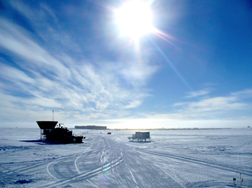

Sönderfallsreaktionen för ozon sker enligt följande mekanism:

$$\ce{O_3 (g)<=>[k_1][k_{-1}] O_2 (g) + O\cdot (g)}$$
$$\ce{O_3(g) + O\cdot (g)->[k_2] 2O_2 (g)}$$

<div style="background-color: lightyellow; border: 2px solid black; padding: 10px;">

**UPPGIFT 1: Hastighetsuttryck för ozonmekanismen**

I ditt labbprotoll, teckna hastighetsuttryck för reaktanten O<sub>3</sub>, produkten O<sub>2</sub> och intermediären O$\cdot$.

Gör sedan ett rimligt steady-state antagande och teckna ett uttryck för den resulterande förbrukningshastigheten av O<sub>3</sub>.
</div>

I cellen nedan finns Python-kod för att beräkna koncentrationen av O<sub>3</sub>, O<sub>2</sub> och O$\cdot$ för olika hastighetskonstanter och initialkoncentrationer, med och utan steady-state-approximationen (SSA).

Programmet plottar sedan koncentrationen som funktion av tiden och du kan då jämföra hur tidsberoende av O<sub>3</sub> ser ut, med och utan (SSA).

<div style="background-color: lightyellow; border: 2px solid black; padding: 10px;">

**UPPGIFT 2: Testa betingelser för SSA**

Kör programmet nedan genom att klicka på "Spela-upp" knappen ovan, eller `Ctrl-Enter`.
    
Testa olika kombinationer av hastighetskonstanter för att undersöka när SSA kan vara ett rimligt antagande.
    
* Börja med: (1) $k_1/k_{-1} = 10$ och $k_{-1} = k_2$, sedan (2) $k_1/k_{-1} = 0.1$ och $k_{-1} = k_2$.

* Testa sedan flera kombinationer med andra värden av $k_1, k_{-1}$ och $k_2$, för att se både när SSA är lämplig, och när den inte är lämplig.

Jämför och diskutera resultaten, samt sammanfatta i ditt protokoll vad som finns för olika scenarion då SSA skulle vara lämplig! Du kan kopiera delar av skärmen (t.ex. grafen och värdena) till ditt protokoll genom att använda `Shift+Win+S` och välja vad du vill kopiera från skärmen.
</div>

In [1]:
## Program för att numerisk lösning av kinetiska modellen, både exakt lösning och med SSA

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Define the rate equations for the ozone decomposition
def rate_equations(t, concentrations, k1, k_1, k2):
    O3, O2, O = concentrations
    dO3_dt = -k1*O3 + k_1*O2*O - k2*O3*O
    dO2_dt = k1*O3 - k_1*O2* O + 2*k2*O3*O 
    dO_dt =  k1*O3 - k_1*O2* O - k2*O3*O 
    return [dO3_dt, dO2_dt, dO_dt]

# Initial concentrations of O3, O2 and 0
initial_concentrations = [1.0, 0.0, 0.0]

# Time span (0 to 10 minutes)
time_span = (0, 10)

# Time points for evaluation
time_points = np.linspace(0, 10, 200)
time_step = 10/199

# Function to update the plot based on slider values
def update_plot(k1, k_1, k2, xmin, xmax, ymax, show_O2):
    # exact numerical solution
    solution = solve_ivp(rate_equations, time_span, initial_concentrations, t_eval=time_points, args=(k1, k_1, k2))
    
    # SSA, stepwise solution
    inst_conc = np.zeros((200,2)) # create array for instanteous conc of [O3] and [O2] at each time point
    inst_conc[0] = initial_concentrations[:2] #initial concentrations of [O3] and [O2] in first row
    
    for i in range(1,200):
        O = (k1*inst_conc[i-1,0])/(k_1*inst_conc[i-1,1] + k2*inst_conc[i-1,0]) #[O from SSA]
        #incremental change in [O3] and [O2], from d[O3]/dt and d[O2]/dt, respectively
        dO3 = (-k1*inst_conc[i-1,0]+k_1*inst_conc[i-1,1]*O-k2*inst_conc[i-1,0]*O)*time_step
        dO2 = (k1*inst_conc[i-1,0]-k_1*inst_conc[i-1,1]*O+2*k2*inst_conc[i-1,0]*O)*time_step
                
        inst_conc[i]=inst_conc[i-1]+[dO3, dO2]
    
    plt.plot(solution.t, solution.y[0], label='[O_3]')
    #create toggle for whether to show the product curve O2
    if show_O2:
        plt.plot(solution.t, solution.y[1], label='[O_2]')
    plt.plot(solution.t, solution.y[2], label='[O]',color='g')
    plt.plot(time_points, inst_conc[:,0], label='[O_3(SSA)]', linestyle='dashed', color='r')
    plt.axis((xmin, xmax, 0, ymax))
    plt.xlabel('Tid (minut)')
    plt.ylabel('Koncentration (M)')
    plt.legend()
    plt.title('Kocentration vs tid för ozonsönderfall')
    plt.show()

# Create interactive sliders for k1, k_1, k2, and checkbox for [O_2]
interact(update_plot, k1=widgets.FloatSlider(value=1.0, min=0.1, max=20.0, step=0.1, description='k1'),
                   k_1=widgets.FloatSlider(value=0.5, min=0.1, max=20.0, step=0.1, description='k_1'),
                   k2=widgets.FloatSlider(value=0.5, min=0.1, max=20.0, step=0.1, description='k2'),
                   xmin=widgets.FloatSlider(value=0, min=0, max=10.0, step=0.1, description='xmin'),
                   xmax=widgets.FloatSlider(value=10, min=0.1, max=10.0, step=0.1, description='xmax'),
                   ymax=widgets.FloatSlider(value=1.5, min=0, max=2.0, step=0.01, description='ymax'),
                   show_O2=widgets.Checkbox(value=True, description='Show [O_2]'))

interactive(children=(FloatSlider(value=1.0, description='k1', max=20.0, min=0.1), FloatSlider(value=0.5, desc…

<function __main__.update_plot(k1, k_1, k2, xmin, xmax, ymax, show_O2)>

<line>

<center><H3>II. Att använda Python för att lösa kinetiska modeller numeriskt</center></H3>

På denna del av datorlaborationen kommer ni att själva bygga upp en kinetisk modell för en reaktionsmekanism och lösa den med hjälp av en ODE-lösare (*ODE: ordinary differential equations*). Koden ovan kommer ni att använda som hjälpmedel för er kod.

I denna del av laboration behöver ni **inte** tillämpa steady-state-approximationen - **ni löser bara den kinetiska modellen exakt med ODE-lösaren**. 

Syftet är att ni både får träning i att bygga upp kinetiska modell och även omsätta och utveckla era kunskaper i Python för att göra numeriska simuleringar. Arbetsmetoden kan även användas i andra sammanhang för att modellering tidsberoende beteende.

Istället för att använda det interaktiva reglaget kommer ni att använda funktionen `input` för att få användare att skriva en värden på hastighetskonstanter varje gång programmet körs.

Reaktionsmekanismen som ni kommer att bygga en kinetik modell till och lösa numeriskt är för nedbrytning av N<sub>2</sub>O<sub>5</sub>.

$$\ce{N_2O_5 <=>[k_a][k_a'] NO_2 (g) + NO_3}$$

$$\ce{NO_2 + NO_3 ->[k_b] NO_2 + O_2 + NO}$$

$$\ce{NO + N_2O_5 ->[k_c] 3 NO_2}$$

<div style="background-color: lightyellow; border: 2px solid black; padding: 10px;">

**UPPGIFT 3: Förstå koden**

1. Kolla genom koden ovan och tolka vad varje block av kod har för funktion. *Sammanfatta dessa i ditt protokoll.*
2. Funktionen `solveivp` från SciPy-biblioteket användes ovan för att anropa ODE-lösaren som behövdes. Läs dokumentationen för ODE-lösaren `solveivp` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) för att förstå hur programmet är uppbyggt för att beräkna en exakt numerisk lösning av den kinetiska modellen för ozonmekanismen. 
3. Bestäm vilka delar av koden du kommer att behöva använda eller anpassa, och vilka som inte kommer att användas. Kom ihåg att du ska inte ha ett interaktivt reglage, utan användaren ska mata in värden på hastighetskonstanterna varje gång programmet körs. *Sammanfatta hur du resonerar i protokollet.*
4. Läs följande genomgång om funktionen `input` för att ta emot input från användaren: https://www.includehelp.com/python/read-input-as-a-float.aspx. 
</div>

<div style="background-color: lightyellow; border: 2px solid black; padding: 10px;">

**UPPGIFT 4: Bygg den kinetiska modellen för N<sub>2</sub>O<sub>5</sub>**

1. Bestäm nettoreaktionen för nedbrytning av N<sub>2</sub>O<sub>5</sub> enligt mekanismen ovan. Redovisa hur du resonerar i ditt protokoll och bestäm dessutom vilka intermediärer som finns i mekanismen.
2. Teckna i ditt protokoll hastighetsutryck för alla inblandade molekylslag enligt mekanismen ovan. Detta blir din kinetiska modell för reaktionen. **Obs**: du behöver <i>inte</i> tillämpa SSA då ni kommer att lösa exakt numeriskt.

</div>

<div style="background-color: lightyellow; border: 2px solid black; padding: 10px;">

**UPPGIFT 5: Lös den kinetiska modellen för nedbrytning av N<sub>2</sub>O<sub>5</sub>**

1. Med hjälp av hastighetsuttrycken och koden ovan för ozonmekanismen som exempel, skriv ett program nedan som löser den kinetiska modellen och plottar hur de olika molekylslagens koncentrationer ändras med tid. Se till att inkludera funktionen i programmet så att användaren kan mata i värden för hastighetskonstanterna varje gång programmet körs.
2. Testa olika kombinationer av värden för hastighetskonstanterna för att se när steady-state-approximationen kan vara lämplig för samtliga hastighetskonstanter. *Redovisa och sammanfatta vad du kommer fram till i ditt protokoll!* (Återigen, `Shift+Win+S`för skärmurklipp)
<div>

In [ ]:
## Här skriver du och testar din kod för att numeriskt lösa din kinetiska modell för nebryntning av N_2O_5









<line>

<center><H3>III. Kedjereaktion </center></H3>

En typ av komplexa reaktionsmekanismer som ni träffar under kursens gång är kedjereaktioner (*eng.* chain reactions). Dessa reaktioner har stora betydelser inom vissa områden t.ex. polymertillverkning och kärnkraft.

En klassisk kedjerekation består av fyra typer av reaktionssteg: **initiering, progagering, inhibering och terminering** (fast inhibering måste inte förekomma). De kan även vara ogrenade eller grenade. Med ogrenade reaktioner återbildas under propageringsstegen lika många reaktiva intermediärer som kallas för **kedjebärare** (*eng* chain carriers) som förbrukas under dessa steg. För grenade reaktioner bildas det fler och fler kedjebärare under propageringsstegen. Exempel är kallgasexplosioner och sönderfallsreaktoiner av U-235 i kärnkraftsreaktorer.

**I detta avsnitt kommer du att granska en klassisk ogrenad kedjereaktion, nämligen bildning av HBr från Br<sub>2</sub> och H<sub>2</sub>.**

*Nettoreaktionen*:
$$\ce{H_2 + Br_2 -> 2 HBr}$$

*Reaktionsmekanismen (något förenklad)*:

**Initieringen** $$\ce{Br_2 ->[k_1] Br\cdot + Br\cdot}$$
**Propagering** $$\ce{Br\cdot + H_2 ->[k_2] HBr + H\cdot}$$
$$\ce{H\cdot + Br_2 ->[k_3] HBr + Br\cdot}$$
**Inhibering** $$\ce{H\cdot + HBr ->[k_4] H_2 + Br\cdot}$$
**Terminering** $$\ce{Br\cdot + Br\cdot ->[k_5] Br_2}$$

<div style="background-color: lightyellow; border: 2px solid black; padding: 10px;">

**UPPGIFT 6: Granska en kedjereaktion**
    
*Svara på följande frågor i ditt protokoll, innan du kör programmet nedan:*

1. Vad är poängen med initieringssteget?
2. Vilka är kedjebärare i denna reaktion? Förklara varför de klasses som kedjebärare, inte bara "vanliga" intermediärer?
3. Vad är skillnaden mellan ett inhiberings- och termineringssteg? Finns det kopplingar till initerings- och propageringsstegen?
4. Om initieringssteget avstannade några sekunder efter att reaktionen påbörjats, skulle produktbildningen då stanna? Förklara ditt svar!

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox, VBox, interactive_output
from IPython.display import display

# Define the rate equations for the ozone decomposition
def chain_rxn(t, concentrations, k1, k2, k3, k4, k5):
    Br2, H2, Br, H, HBr = concentrations
    dBr2_dt = -k1*Br2 - k3*H*Br2 + k5*Br**2
    dH2_dt = -k2*Br*H2 + k4*H*HBr
    dBr_dt = 2*k1*Br2 - k2*Br*H2 + k3*H*Br2 + k4*H*HBr - 2*k5*Br**2
    dH_dt = k2*Br*H2 - k3*H*Br2 - k4*H*HBr
    dHBr_dt = k2*Br*H2 + k3*H*Br2 - k4*H*HBr
    return [dBr2_dt, dH2_dt, dBr_dt, dH_dt, dHBr_dt]

# Time span (0 to 10 minutes)
time_span = (0, 10)

# Time points for evaluation
time_points = np.linspace(0, 10, 200)

# Function to update the plot based on slider values
def update_plot(k1, k2, k3, k4, k5, Br2_0, H2_0, Br_0, H_0, HBr_0, xmin, xmax, ymax):
    initial_concentrations = [Br2_0, H2_0, Br_0, H_0, HBr_0]
    solution = solve_ivp(chain_rxn, time_span, initial_concentrations, t_eval=time_points, args=(k1, k2, k3, k4, k5))

    plt.figure(figsize=(7, 5))
    plt.plot(solution.t, solution.y[0], label='[Br2]')
    plt.plot(solution.t, solution.y[1], label='[H2]')
    plt.plot(solution.t, solution.y[2], label='[Br.]')
    plt.plot(solution.t, solution.y[3], label='[H.]')
    plt.plot(solution.t, solution.y[4], label='[HBr]')    

    plt.axis((xmin, xmax, 0, ymax))
    plt.xlabel('Tid')
    plt.ylabel('Koncentration')
    plt.legend()
    plt.title('Koncentration vs tid')
    plt.show()

# Create interactive sliders
sliders = {
    'k1': widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='k1'),
    'k2': widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='k2'),
    'k3': widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='k3'),
    'k4': widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='k4'),
    'k5': widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='k5'),
    'Br2_0': widgets.FloatSlider(value=1.0, min=0, max=2.0, step=0.1, description='Br2_0'),
    'H2_0': widgets.FloatSlider(value=1.0, min=0, max=2.0, step=0.1, description='H2_0'),
    'Br_0': widgets.FloatSlider(value=0, min=0, max=2.0, step=0.1, description='Br_0'),
    'H_0': widgets.FloatSlider(value=0, min=0, max=2.0, step=0.1, description='H_0'),
    'HBr_0': widgets.FloatSlider(value=0, min=0, max=2.0, step=0.1, description='HBr_0'),
    'xmin': widgets.FloatSlider(value=0, min=0, max=10.0, step=0.05, description='xmin'),
    'xmax': widgets.FloatSlider(value=10, min=0, max=10.0, step=0.05, description='xmax'),
    'ymax': widgets.FloatSlider(value=1.5, min=0, max=2.0, step=0.05, description='ymax')
}

# Create the interactive output
output = interactive_output(update_plot, sliders)

# Arrange sliders and plot in a horizontal box
ui = HBox([VBox(list(sliders.values())), output])

# Display the UI
display(ui)

<div style="background-color: lightyellow; border: 2px solid black; padding: 10px;">

**UPPGIFT 7: Mer om kedjereaktionen**
    
Kör programmet ovan och sedan följ sedan instruktionen nedan. Svara på frågorna i ditt protokoll!
    
**Obs!** Värden på hastighetskonstanter och koncentrationer ovan är för endast relativa varandra (dvs. inga enheter används) - en förenkling för att illustrera reaktionens beteende kvalitativt. (Återigen, `Shift+Win+S`för skärmurklipp)

1. Testa vad som händer om initieringssteget inte äger rum (dvs. sätt <i>k<sub>1</sub></i> = 0) och . Varför blir det så? 
2. Med initieringssteget fortfarande "avstängt", sätt [Br$\cdot$]<sub>0</sub> = 0.1. Vad händer då? Vad händer om du gör flera ändringar i koncentrationen av [Br$\cdot$]<sub>0</sub> och [H$\cdot$]<sub>0</sub>? Varför blir det så? Vad säger detta om initieringsstegets roll?
3. Återställ initieringssteget och testa nu olika betingelser med propageringsstegets hastighetskonstanter. Redovisa och diskutera vad som händer hastigheten för produktbildningen.
4. Återställ hela reaktionen (klicka i kodcellen sedan klicka på "Spela-upp" knappen ovan, eller `Ctrl-Enter`). Testa och jämför effekten av att ändra hastigheten på inhibieringssteget respektive termineringssteget. Har de samma effekt vad gäller koncentrationer och hastigheter för reaktanterna, kedjebärarna och produkten? Med hänvisning till dina resultat, redovisa och diskutera hur detta kopplas med dina svar till frågorna innan ni körde programmet.
    